# ¡Hola Adolfo! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Adolfo, tu trabajo muestra una comprensión sólida del análisis de datos, con una correcta manipulación inicial de los datos, representaciones gráficas claras y análisis bien fundamentados sobre tendencias en ventas, popularidad de consolas y géneros, así como diferencias regionales. Es evidente que has logrado conectar de forma acertada la información con fenómenos de la industria. 

Aun así, hay algunos aspectos que podrías revisar para fortalecer tu análisis. Por un lado, sería útil evitar reemplazar datos faltantes con ceros sin una justificación estadística clara, ya que esto puede llevar a interpretaciones erróneas; por otro lado, en las pruebas estadísticas, incorporar pasos como la prueba de Levene puede mejorar la validez de tus resultados. También podrías mejorar la presentación de las comparaciones regionales con visualizaciones más integradas que faciliten la lectura. 

En general, has hecho un muy buen trabajo estas recomendaciones son ideas para llevar tu trabajo a un siguiente nivel. Estoy seguro que las habilidades que has aprendido en este proyecto complementarán notablemente tu proceso de formación. 

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

# ÉXITO EN LOS JUEGOS

## Introducción

En este proyecto identificaremos patrones para determinar si un juego de la tienda onlice ICE tiene éxito o no, con la finalidad de detectar proyectos prometedores y planificar campañas publicitarias.

Se cuenta con un dataset con el que trabajaremos, en dónde contiene varias columnas:
* Name - Nombre del juego.
* Plataform - La Plataforma del juego.
* Year_of_Release - El año de lanzamiento.
* Genre - el genero del juego.
* NA_sales - ventas en Norteamerica
* EU_sales - ventas en Europa
* JP_ sales - ventas en Japón
* Other_sales - ventas en otros paises.
* Critic_score - calificación crítica
* User_score - calificación dada por el usuario
* Rating - clasificacion que emite la ESRB

## Paso 1. Importar las posibles librerias a usarse y cargar el dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

games = pd.read_csv('/datasets/games.csv')

games.info() #Aplicamos info() para ver como esta el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
# Vamos a desplegar una parte del dataframe para ver su contenido.

display(games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Aqui podemos analizar que el nombre de las columnas tienen mayúsculas y minúsculas, y podemos detectar cuales columnas cuentan con datos nulos que son: 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score' y 'Rating'. También podemos ver que tipo de datos hay en cada columna, es así que detectamos que en la columna 'Year_of_Release' es de tipo float al igual que 'Critic_Score' y podríamos transformarlas o int, siempre y cuando sean números enteros, por otro lado la columna 'User_Score' esta como objeto y la podemos transformar en float por ser números que podemos usar para algún cálculo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

</div>

## Paso 2. Preparar los datos

Esto incluye la limpieza y preparación del tipo de datos para poder trabajar con ellos, y decidir que hacer con los valores nulos o ausentes.

In [3]:
#Pondremos el nombre de las columnas en minúsculas

new_names = []
for old_names in games.columns:
    new_name = old_names.lower()
    new_names.append(new_name)
games.columns = new_names

print(games.columns) #Comprobamos que se haya aplicado


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
# Primero vemos si en general el dataframe tiene filas duplicadas
print(games.duplicated().sum())
print()

# Ahora vamos a convertir el tipo de datos en las columnas

games['year_of_release'] = games['year_of_release'].fillna(-1).astype('int')

# Voy a ver el contenido de las columnas 'critic_score' y 'user_score' para saber si cambio el tipo de datos a int o float
print(games['critic_score'].unique())
print()
print(games['user_score'].unique())



0

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Primero verificamos si había filas duplicadas, y no tenemos.

Luego se convirtio el tipo de dato de la columna 'year_of_release' a tipo int, por ser los años tipo de números entero, no se cambia a datetime ya que solo tenemos la información del año y no de la fecha completa, sin embargo, para poder hacer este cambio se rellenaron los datos ausentes a -1 para detectar y saber que esos años no tenían valores o son valores desconocidos.

Por otro lado desplegamos los valores únicos de las columnas 'critic_score' y 'user_score'- Al ver esta información se tomó la decisión de transformar la columna 'critic_score' a tipo int y la columna 'user_score' a tipo float. Sin embargo tambien vemos que contienen datos nulos. 

In [5]:
games['critic_score'] = games['critic_score'].fillna(0).astype('int')
games['user_score'] = games['user_score'].replace('tbd', 0)
games['user_score'] = games['user_score'].fillna(0).astype(float)

games.info() #Para comprobar que se hayan hecho los cambios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Lo que hice fue tratar de cambiar el tipo de datos de las columnas 'critic_score' y 'user_score' sin embargo me marcó error por contener datos ausentes y una abreviatura 'tbd' que significa a determinar, por lo que decidí antes de hacer la tranformación del tipo de datos, rellenar los valores ausentes por 0 y sustituir la palabra tbd por 0. Decidí cambiarlo al número 0 ya que es un valor ausente o a determinar en una calificación y para mi estos datos y no tener una calificación es igual a cero.

De esta manera ya transformamos los tipos de datos de las diferentes columnas, pero todavia tenemos otras columnas con valores nulos y tenemos que decidir que hacer en los siguientes renglones:

In [6]:
print(games['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Aqui en la columna 'rating' vemos las diferentes clasificaciones que hace el Entertainment Software Rating Board, y una de sus clasificaciones 'RP' que es Pendiente de Clasificación, que podríamos usar este tipo para los datos nulos

In [7]:
games['rating'] = games['rating'].fillna('RP')


In [8]:
games['name']= games['name'].fillna('unknown')

games['genre']= games['genre'].fillna('Misc')

games.info() #Para verificar que se haya aplicado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


En estos últimos pasos se completaron los datos nulos o ausentes en la columna 'rating' por RP que es pendiente de clasificación y decidimos usar el tipo de genero 'Misc' para sustituir los valores nulos, ya que este tipo de genero es Miscelaneo o que es de varios generos, para la columna 'name' eran pocos los valores ausentes, pero decidí cambiarlos por la palabra 'unknown' que significa desconocido.

No sabemos que pudo haber generado estos datos ausentes, pensando que es información que no se tenía a la mano y no había datos con que completar la tabla, pudiendo ser que sean juegos de poca importancia, pero aún así fueron incluidos en el dataframe.

Ahora si tenemos el dataframe limpio y listo para usarse.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has manejado adecuadamente las columnas con valores nulos y aplicado transformaciones que facilitan el análisis. Sin embargo, convertir valores nulos y datos como "tbd" directamente en ceros puede ser riesgoso, ya que puede distorsionar los análisis si esos ceros se interpretan como puntuaciones reales. Sería mejor usar `np.nan` y luego decidir cómo tratarlos según el análisis.

</div>

### Calcularemos las ventas totales de los juegos y crearemos una nueva columna en el dataframe

In [9]:
total_sales = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games['total_sales'] = total_sales

display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,RP,31.38


## Paso 3. Análisis de datos

Vamos a analizar cuantos juegos fueron lanzados en los diferentes años

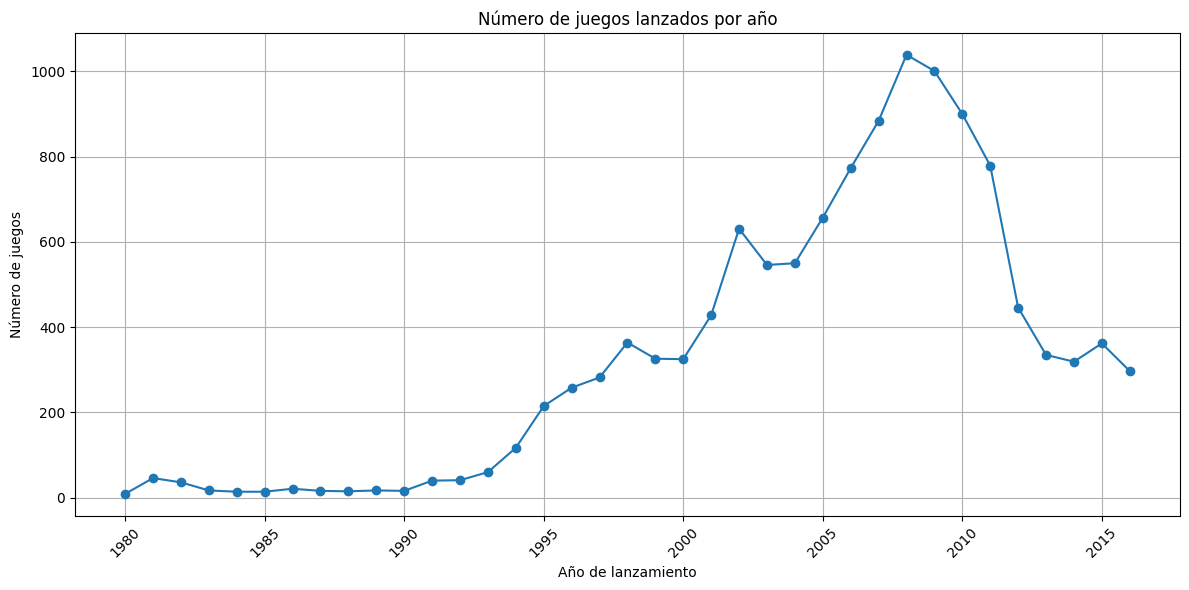

In [10]:
games_by_year = games.groupby('year_of_release')['name'].nunique().reset_index(name='num_games')

filtered = games_by_year[games_by_year['year_of_release'] >= 1] #Por los años que cambiamos a -1 cuando sustituimos los valores nulos

plt.figure(figsize=(12, 6))
plt.plot(filtered['year_of_release'], filtered['num_games'], marker='o')

plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos apreciar que conforme el paso de los años fue aumentando el número de juegos lanzados, apreciando que en el año 2008 hubo un boom y es el año que más número de juegos fueron lanzados, a partir de ahi empezo a disminuir.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo! La gráfica muestra un crecimiento hasta 2008-2009, seguido de una caída en lanzamientos. Esto podría deberse al éxito de consolas como PS3 y Xbox 360, y luego a cambios en la industria: más enfoque en calidad, auge de juegos móviles, distribución digital o la crisis de 2008.

</div>

Ahora observaremos cómo varian las ventas de una plataforma a otra

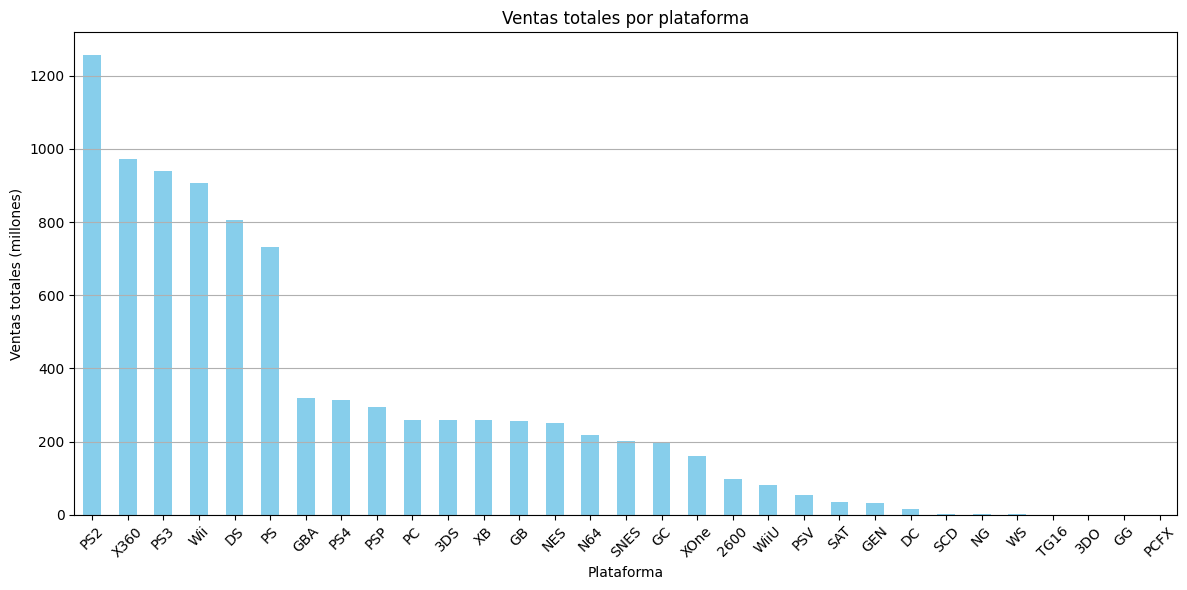

In [11]:
sales_by_plataform = games.groupby('platform')['total_sales'].sum()

#Ordenaré las ventas de manera descendente
sales_by_plataform_sorted = sales_by_plataform.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_plataform_sorted.plot(kind='bar', color='skyblue')

plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Podemos observar que la plataforma que mas ventas generó fue PS2 seguido del X360.

Ahora se elegiran las plataformas con mayores ventas totales y veremos la distribución por año:

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Perfecto! La gráfica muestra claramente que la PlayStation 2 lidera en ventas, seguida por la Xbox 360 y la PlayStation 3. También destacan la Wii, Nintendo DS y la primera PlayStation. Las consolas más antiguas o menos populares tienen ventas mucho menores, lo que refleja la preferencia del mercado por Sony y Microsoft.

</div>

In [12]:
top_platforms = sales_by_plataform.sort_values(ascending=False).head(10).index


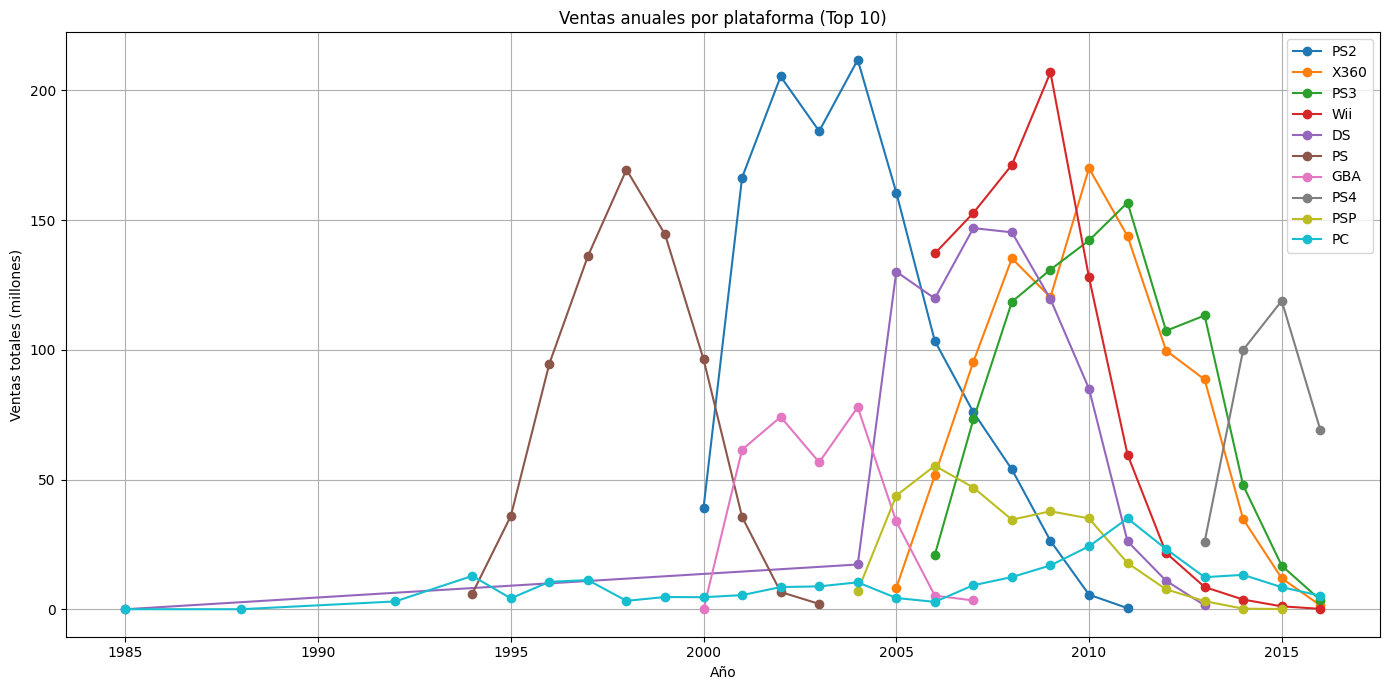

In [13]:

valid_games = games[(games['year_of_release'] >= 1980) & (games['platform'].isin(top_platforms))] #Esto fue para no considerar el año que tenemos catalogado como -1

platform_year_sales = valid_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(14, 7))

for platform in top_platforms:
    data = platform_year_sales[platform_year_sales['platform'] == platform]
    plt.plot(data['year_of_release'], data['total_sales'], marker='o', label=platform)

plt.title('Ventas anuales por plataforma (Top 10)')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver como las plataformas tienen años que les son muy buenos y ya detectamos cuales son los años con más ventas de cada plataforma, que debe estar relacionado con el juego que lanzaron ese año y que tuvo muy buenas ventas. Y podemos ver también que la mayoría de las plataformas nacen después de los años 2000.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

El gráfico confirma que cada generación de consolas tiene un ciclo de vida (aproximadamente 5 años) con un período de auge y una posterior caída, lo que sugiere que el éxito de un videojuego está fuertemente vinculado al momento en el que es lanzado dentro de ese ciclo. 

</div>

In [14]:
# Filtramos solo años válidos
valid_years = games[games['year_of_release'] >= 1980] # Por el año que pusimos de -1

# Agrupamos por plataforma y año
platform_year_sales = valid_years.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

Vamos a identificar las plataformas que dejaron de tener ventas

In [15]:
# Último año de ventas por plataforma
last_sales_year = platform_year_sales.groupby('platform')['year_of_release'].max()

# Plataformas sin ventas recientes (por ejemplo, que terminaron antes de 2015)
inactive_platforms = last_sales_year[last_sales_year < 2015]
print("Plataformas que ya no tienen ventas:\n", inactive_platforms.sort_values())

Plataformas que ya no tienen ventas:
 platform
2600    1989
GG      1992
SCD     1994
GEN     1994
NES     1994
3DO     1995
TG16    1995
NG      1996
PCFX    1996
SAT     1999
SNES    1999
WS      2001
GB      2001
N64     2002
PS      2003
GBA     2007
GC      2007
DC      2008
XB      2008
PS2     2011
DS      2013
Name: year_of_release, dtype: int64


Ahora veamos el ciclo de vida de las plataformas

In [16]:
# Primer y último año de ventas
life_cycle = platform_year_sales.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Duración en años
life_cycle['duración'] = life_cycle['max'] - life_cycle['min'] + 1

# Ordenar por año inicial
life_cycle_sorted = life_cycle.sort_values(by='min')
print(life_cycle_sorted)

           min   max  duración
platform                      
2600      1980  1989        10
NES       1983  1994        12
DS        1985  2013        29
PC        1985  2016        32
GB        1988  2001        14
SNES      1990  1999        10
GEN       1990  1994         5
GG        1992  1992         1
SCD       1993  1994         2
NG        1993  1996         4
SAT       1994  1999         6
PS        1994  2003        10
3DO       1994  1995         2
TG16      1995  1995         1
PCFX      1996  1996         1
N64       1996  2002         7
DC        1998  2008        11
WS        1999  2001         3
GBA       2000  2007         8
XB        2000  2008         9
PS2       2000  2011        12
GC        2001  2007         7
PSP       2004  2015        12
X360      2005  2016        12
PS3       2006  2016        11
Wii       2006  2016        11
3DS       2011  2016         6
PSV       2011  2016         6
WiiU      2012  2016         5
PS4       2013  2016         4
XOne    

Ya podemos ver la duración por plataforma, y ahora podemos sacar un promedio de la duración de las plataformas.

In [17]:
print("Duración promedio de las plataformas (años):", life_cycle['duración'].mean())

Duración promedio de las plataformas (años): 8.612903225806452


El promedio de duración son 8 años, con esto podemos ver las plataformas en particular y ver un estimado de la duración que le queda a dicha plataforma.

Vamos a determinar el periodo de 2013 a 2016 (ultimos 4 años de actividad reciente) para detectar tendencias de crecimiento o declive.

In [18]:
recent_games = valid_games[(valid_games['year_of_release'] >= 2013) & (valid_games['year_of_release'] <= 2016)]


Vamos a tratar de contestar las preguntas de ¿Qué plataformas son líderes, cuáles crecen y cuáles se reducen?

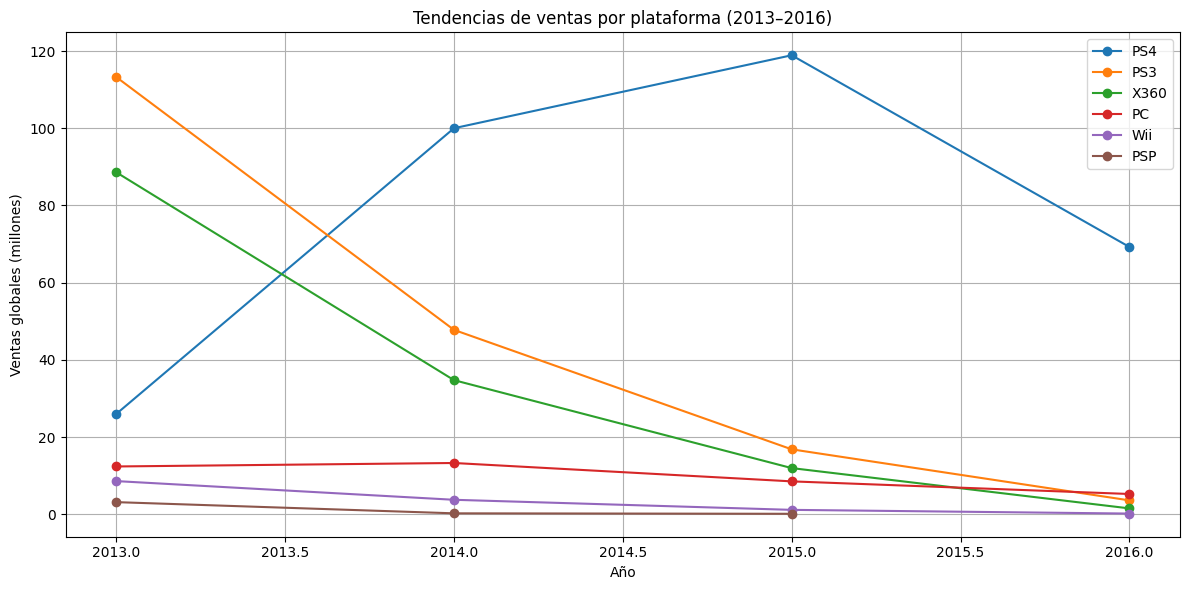

In [19]:
#Agruparemos las ventas por año y por plataforma
sales_trend = recent_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Visualizaremos la información

top_recent_platforms = recent_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index

plt.figure(figsize=(12, 6))
for platform in top_recent_platforms:
    data = sales_trend[sales_trend['platform'] == platform]
    plt.plot(data['year_of_release'], data['total_sales'], marker='o', label=platform)

plt.title('Tendencias de ventas por plataforma (2013–2016)')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver que los líderes en ventas recientes son: PS4, PC, PS3. El que tiene más crecimiento es PS4 y las plataformas que van en declive son: Wii, X360, PS3.


In [20]:
#Para obtener las plataformas más rentables
recent_platforms = recent_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(recent_platforms.head(8))


platform
PS4     314.14
PS3     181.43
X360    136.80
PC       39.43
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


Yo recomendaría para la campaña del 2017, apoyar a PS4 que ess un líder en ventas y crecimiento continuo y posiblemente PC que ha demostrado ser constante. 


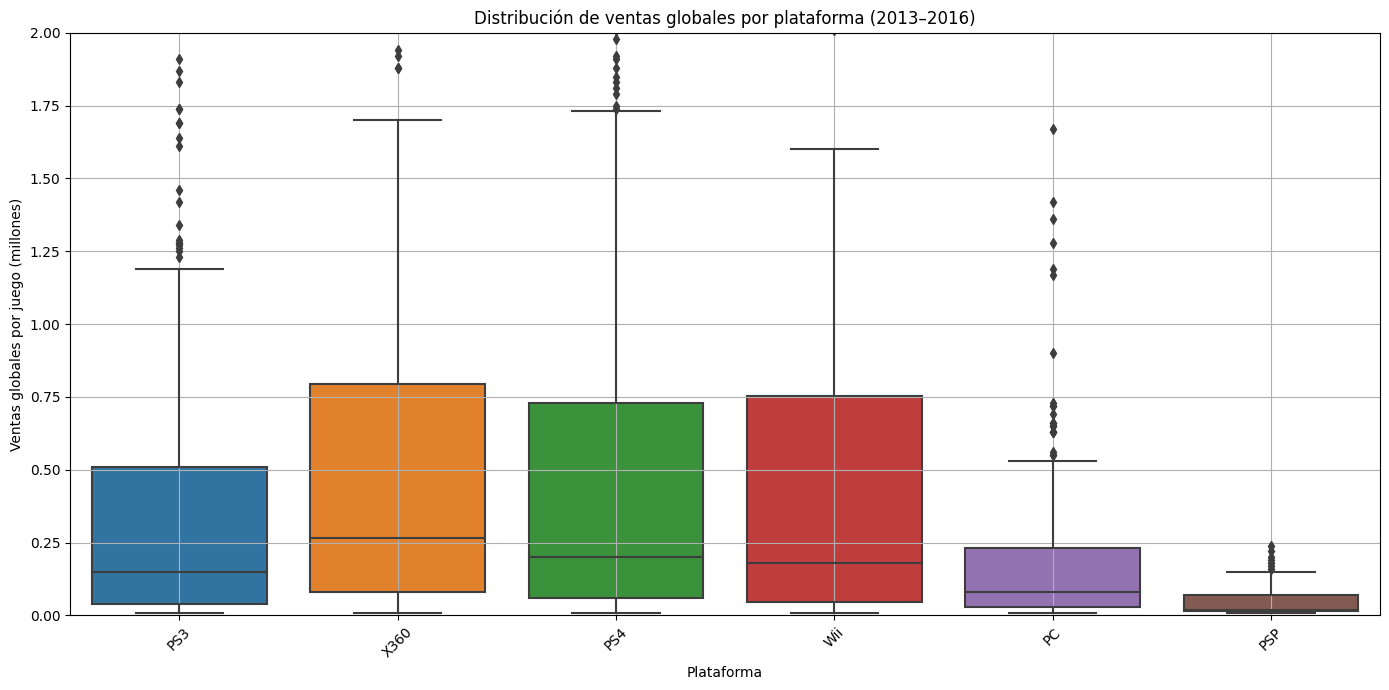

In [21]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='platform', y='total_sales', data=recent_games[recent_games['platform'].isin(top_recent_platforms)])

plt.ylim(0, 2)  
plt.title('Distribución de ventas globales por plataforma (2013–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales por juego (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver que la mayoría de las plataformas tienen una mayor disperión y tienen un sesgo a la derecha y tienen valores atípicos, que deben ser los juegos estrella de dicha plataforma que les generó un mayor número de ventas, y la mediana de la mayoría esta por debajo del cuarto de millón de dolares, y el que tiene una mayor mediana es X360..

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo obteniendo los *box-plot*. Estos muestran que la mayoría de los juegos tienen ventas bajas, hay valores extremos que dominan en cada plataforma. Esto muestra que el éxito de un juego no depende solo de la consola, sino también de su popularidad y estrategia de marketing.

</div>

Ahora veremos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular. Para este análisis elegimos a la plataforma PS4, por tener actividad reciente y buen volumen de ventas.  

In [22]:
# Filtramos juegos de PS4 con valores válidos
ps4_games = games[(games['platform'] == 'PS4') & (games['critic_score'].notna()) & (games['user_score'].notna()) & (games['total_sales'].notna())]

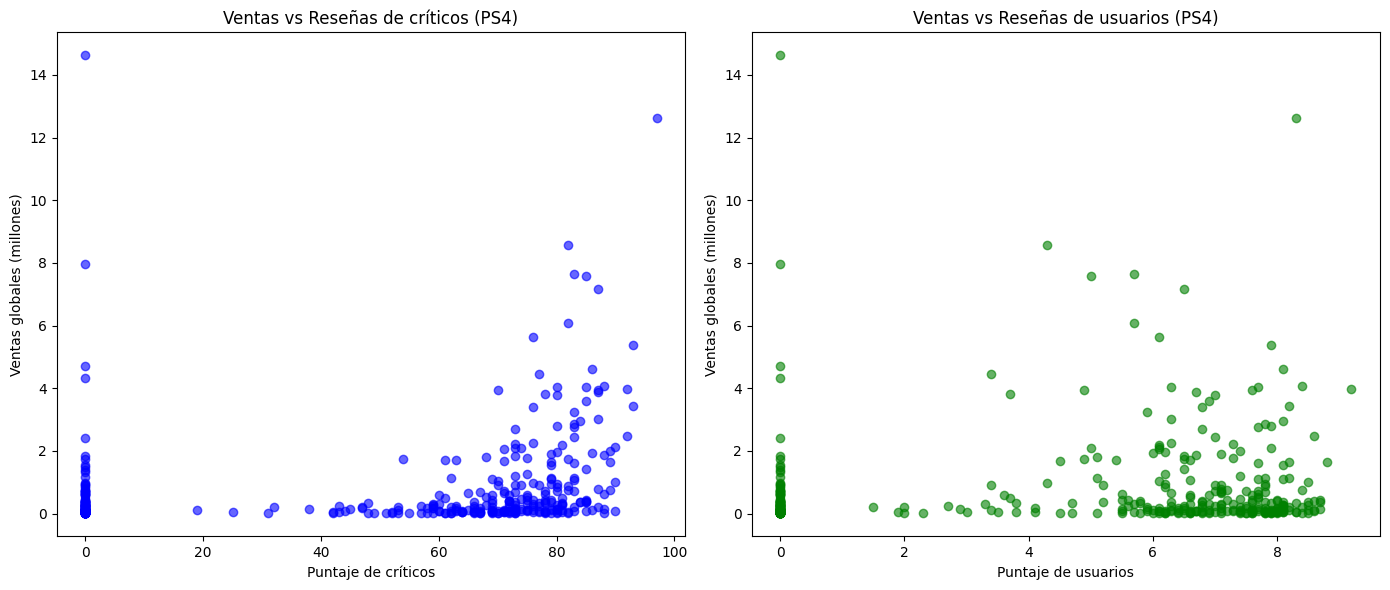

In [23]:
plt.figure(figsize=(14, 6))

# Gráfico 1: critic_score vs total_sales
plt.subplot(1, 2, 1)
plt.scatter(ps4_games['critic_score'], ps4_games['total_sales'], alpha=0.6, color='blue')
plt.title('Ventas vs Reseñas de críticos (PS4)')
plt.xlabel('Puntaje de críticos')
plt.ylabel('Ventas globales (millones)')

# Gráfico 2: user_score vs total_sales
plt.subplot(1, 2, 2)
plt.scatter(ps4_games['user_score'], ps4_games['total_sales'], alpha=0.6, color='green')
plt.title('Ventas vs Reseñas de usuarios (PS4)')
plt.xlabel('Puntaje de usuarios')
plt.ylabel('Ventas globales (millones)')

plt.tight_layout()
plt.show()

In [24]:
# Vamos a tratar de calcular la correlación:

critic_corr = ps4_games['critic_score'].corr(ps4_games['total_sales'])
user_corr = ps4_games['user_score'].corr(ps4_games['total_sales'])

print(f"Correlación entre puntaje de críticos y ventas (PS4): {critic_corr:.2f}")
print(f"Correlación entre puntaje de usuarios y ventas (PS4): {user_corr:.2f}")


Correlación entre puntaje de críticos y ventas (PS4): 0.23
Correlación entre puntaje de usuarios y ventas (PS4): 0.11


En estos gráficosy con el cálculo de la correlación podemos ver que hay una relación y mayor dispersión de las reseñas de críticos que la de los usuarios, si embargo, tampoco demuestran una relación fuerte, sugiriendo que las reseñas no influyen mucho en las ventas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial, Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

</div>

Ahora vamos a comparar cómo se comportan las ventas de los mismos juegos en otras plataforma.

In [25]:
# Contamos en cuántas plataformas está cada juego
multi_platform_games = games.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

# Filtramos esos juegos
shared_games = games[games['name'].isin(multi_platform_games)]


In [26]:
# Nos quedamos con las plataformas más relevantes
platforms_of_interest = ['PS4', 'X360', 'PC']
comparison_data = shared_games[shared_games['platform'].isin(platforms_of_interest)]

# Agrupamos por juego y plataforma
sales_comparison = comparison_data.groupby(['name', 'platform'])['total_sales'].sum().reset_index()


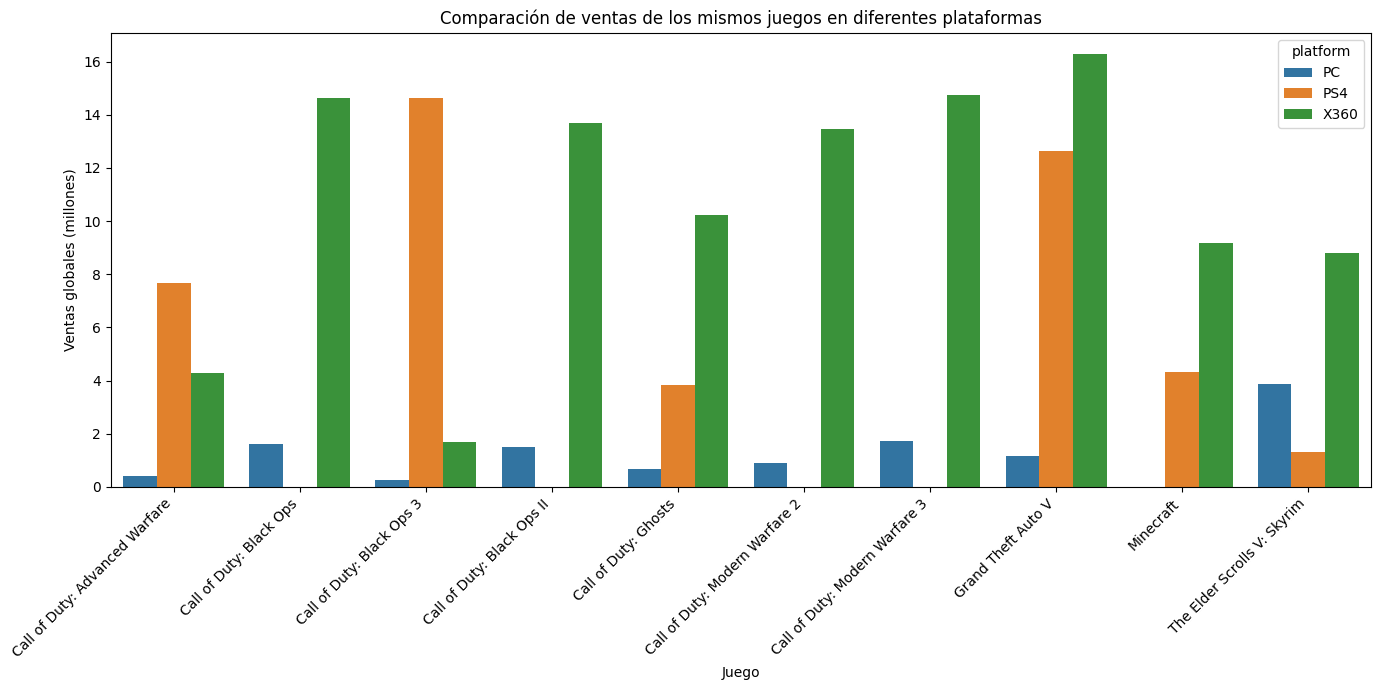

In [27]:
# Tomamos una muestra de 10 juegos populares multiplataforma para que la gráfica sea legible
top_multi = sales_comparison.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10).index
plot_data = sales_comparison[sales_comparison['name'].isin(top_multi)]

plt.figure(figsize=(14, 7))
sns.barplot(data=plot_data, x='name', y='total_sales', hue='platform')
plt.title('Comparación de ventas de los mismos juegos en diferentes plataformas')
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Juego')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Podemos visualizar que el mismo juego y calificación no garantiza el mismo nivel de ventas en todas las plataformas.

Las ventas dependen no solo de la calidad o reseñas del juego, sino fuertemente de la plataforma. Un mismo juego puede vender mucho en PS4 y muy poco en PC o viceversa, dependiendo del tipo de juego y de la audiencia.

Es así que al planear para el 2017, se debe elegir correctamente la plataforma, ya que es tan importante como desarrollar un buen juego.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo analizando los juegos multiplataformas, con esta información es posible relacionar los juegos con mayor popularidad y las plataformas más comercializadas. 

</div>

Ahora analicemos un poco los géneros de lo juegos, y ver cuáles son mas rentables.

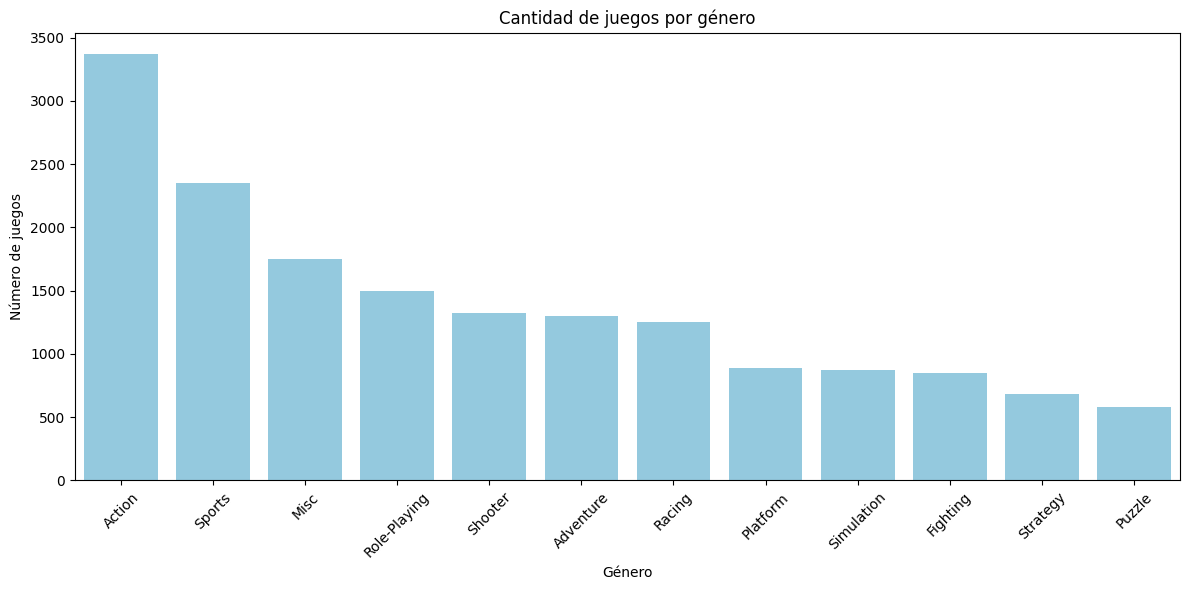

In [28]:
games_by_genre = games['genre'].value_counts().reset_index()
games_by_genre.columns = ['genre', 'num_games']

plt.figure(figsize=(12, 6))
sns.barplot(data=games_by_genre, x='genre', y='num_games', color='skyblue')
plt.title('Cantidad de juegos por género')
plt.xlabel('Género')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver que el genero con mas juegos es el de acción.

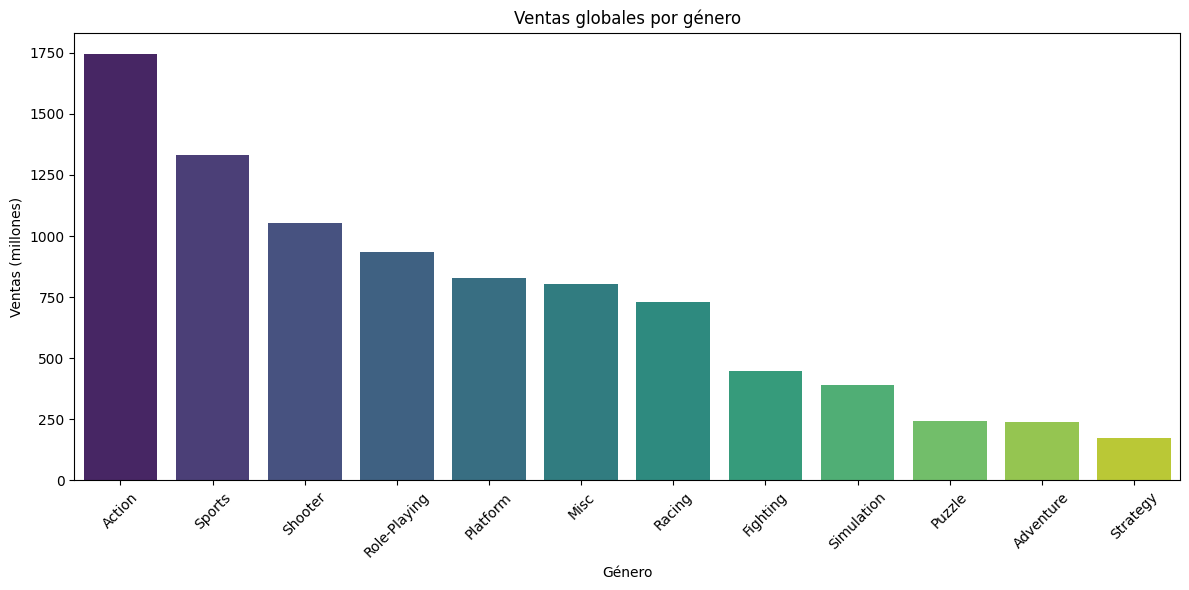

In [29]:
# Vamos a ver ahora las ventas por género.

genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='total_sales', palette='viridis')
plt.title('Ventas globales por género')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo! Se ve claramente que los juegos de acción y deportes lideran en ventas. Los géneros de rol y deportes también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

</div>

y se confirma que el género acción es el que más ingresos genera.

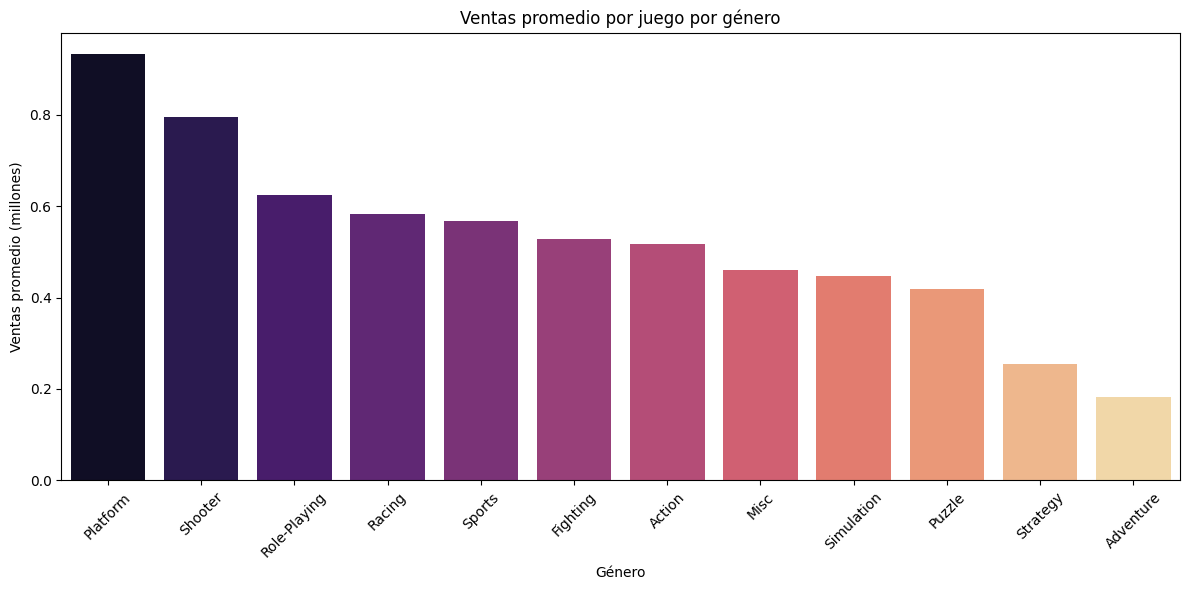

In [30]:
# Vamos a obtener el promedio de ventas por género

avg_sales_by_genre = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_sales_by_genre, x='genre', y='total_sales', palette='magma')
plt.title('Ventas promedio por juego por género')
plt.xlabel('Género')
plt.ylabel('Ventas promedio (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Aqui observamos que el tiene un promedio de venta mayor es el género platform, y los generos con ventas bajas se lo lleva el de aventura, estrategia y rompecabezas.

El género shooter no tiene tantos juegos como el género acción, pero sus juegos son más rentables que los de acción.

El género de acción tiene muchos títulos, pero su venta promedio es menor.

Para ir viendo un plan para el 2017, se tiene que tomar en cuenta un equilibrio entre volumen y rentabilidad de cada género.

## Paso 4. Perfiles por región

1. Vamos a agrupar por plataforma y obtener sus ventas por región, solamente para la región de Norte América (NA), para la región de Europa (EU) y para la región de Japón (JP)

In [31]:
top_5_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

region_sales = games[games['platform'].isin(top_5_platforms)].groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
display(region_sales)

,na_sales,eu_sales,jp_sales
platform,,,
DS,382.40,188.89,175.57
PS2,583.84,339.29,139.20
PS3,393.49,330.29,80.19
Wii,496.90,262.21,69.33
X360,602.47,270.76,12.43


Podemos observar que la región que genera mas ventas es Norte América, y se entiende ya que es mayor la población. Ahora bien, la plataforma PS2 tiene altas ventas en cada una de las regiones. En Japón liderea la plataforma DS, en Norte America es la plataforma X360 y en Europa es la plataforma PS2

In [32]:
top_5_genres = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5).index

genre_region_sales = games[games['genre'].isin(top_5_genres)].groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
display(genre_region_sales)

,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Platform,445.50,200.35,130.83
Role-Playing,330.81,188.71,355.41
Shooter,592.24,317.34,38.76
Sports,684.43,376.79,135.54


Podemos observar que el género de Acción es el que más se vende tanto en Norte América como en Europa, sin embargo el género que más se vende en japón es el de Role_Playing. Y en general podemos ver que la tendencia de gustos en el género es muy similar en Norte América y en Europa.

Ahora vamos a ver si las clasificaciones de ESRB afectan a las ventas en cada región.

In [33]:
# Agrupamos las ventas por 'rating'

rating_sales = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
display(rating_sales)


,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1292.99,710.25,198.11
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,748.48,483.97,64.24
RP,1242.46,613.91,841.96
T,759.75,427.03,151.40


En cuestión de clasificación los juegos que más se venden en Norte América  y en Europa son los de E (Everyone) y en Japón son los RP (Rating Pending). También podemos observar que en Japón se venden más juegos con clasificación E a los de M (para adultos) y en Norte América si se venden muchos de clasificación adulto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Adolfo has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para lograr un análisis comparativo más efectivo, sería beneficioso presentar cada sección de información empleando un único diagrama de barras. Al asignar un color distintivo a cada región, podremos crear una representación visual unificada que facilite la identificación de patrones y diferencias entre las distintas áreas. Esta consolidación de datos no solo optimizará el espacio visual, sino que también permitirá al lector establecer conexiones y comparaciones de manera más intuitiva y directa entre los distintos conjuntos de información. Acá te muestro un ejemplo 

<img src="https://www.analyticslane.com/storage/2022/06/matplotlib-barras-adyacentes.png.webp" width="400">
</div>


</div>

## Paso 5. Prueba de hipótesis.

Vamos a obtener primero la media y la varianza de las calificaciones de los usurios por plataforma

In [34]:
mean_var_plan = games.groupby('platform')['user_score'].agg(['mean','var']).reset_index()
display(mean_var_plan)

,platform,mean,var
0,2600,0.000000,0.000000
1,3DO,0.000000,0.000000
2,3DS,2.285962,11.088068
3,DC,2.296154,14.805475
4,DS,1.685263,9.548280
5,GB,0.000000,0.000000
6,GBA,2.381509,13.263555
7,GC,5.001259,14.251116
8,GEN,0.000000,0.000000
9,GG,0.000000,NaN


La primer hipótesis que vamos a tratar de probar es que las calificaciones promedio de los usuarios para las plataformas XOne  y PC son las mismas.

H(0) = las calificaciones promedio de los usuarios de las plataformas XOne y PC son las mismas

H(1) = las calificaciones promedio de los usuarios de las plataformas XOne y PC son diferentes

In [35]:
# Prueba la hipótesis
xone = games[games['platform']== 'XOne']['user_score']
pc = games[games['platform']== 'PC']['user_score']

results = st.ttest_ind(xone, pc, equal_var = False)
alpha = 0.05

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.0005315801015576501
Rechazamos la hipótesis nula


Ahora probaremos que las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes

H(0) = El promedio de las calificaciones de los usuario es el mismo para los generos de acción y deportes.

H(1) = El promedio de las calificaciones de los usuario es diferente para los generos de acción y deportes.

In [36]:
mean_var_score = games.groupby('genre')['user_score'].agg(['mean','var']).reset_index()
display(mean_var_score)

,genre,mean,var
0,Action,3.831671,13.454083
1,Adventure,1.642287,9.653748
2,Fighting,3.431920,14.222600
3,Misc,1.708733,9.336491
4,Platform,3.519144,14.428224
5,Puzzle,1.583448,9.375822
6,Racing,3.611049,13.604782
7,Role-Playing,3.779239,15.110491
8,Shooter,4.918141,12.061789
9,Simulation,2.811340,13.202291


In [37]:
# Prueba la hipótesis
action = games[games['genre']== 'Action']['user_score']
sports = games[games['genre']== 'Sports']['user_score']

results = st.ttest_ind(action, sports, equal_var = False)
alpha = 0.05

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 1.1599167086071376e-08
Rechazamos la hipótesis nula


Aqui si probamos que el promedio de las calificaciones de los usuarios es distinta para ambos generos. En ambas hipótesis se uso la prueba t de muestras independientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Adolfo aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

# Conclusión

Después de la limpieza que se hizo a la base de datos, empece a trabajar con la información contenida en ella, se calcularon las ventas totales por cada juego, lo que nos permitió realizar otras operaciones para llegar a distintos análisis.

Se obtuvo información de los juegos que han sido lanzado por año, viendo que a partir de 1980 empezó a crecer el número de juegos lanzados por año, hasta más o menos el 2010 dónde empezo a disminuir un poco.
 
Posteriormente observamos como varian las ventas dependiendo la plataforma en la que se lanza el juego, siendo así que las plataformas con mayores ventas son PS2 y X360. Pudimos también observar que todas las plataformas han tenido sus buenas rachas que depende mucho del juego que se lanzó ese año y que ha estado de moda, y por lo tanto generan mayores ventas.

También vemos que hay una tendencia de aumentar gradualmente los juegos lanzados por año.

En el análisis, pudimos ver que el promedio de duración de las plataformas es de 8 años y que en los últimos años la plataforma que más ventas tiene es PS4, podemos ver que la tecnología que usan las plataformas va mejorando, por eso el promedio de duración. Es así que si se va a apoyar algún juego que se lance en el 2017, sería de la idea que usara la plataforma PS4.

También calculamos la correlación que hay entre las reseñas de ususarios o de los críticos con las ventas, siendo una correlación muy baja, por lo que no es algo que afecte mucho, por ejemplo para el caso de una campaña publicitaria no tendría gran impacto si los usuarios califican bien o mal el juego.

Analizando los juegos por género vemos que el género con más ventas es el de acción, pero también vimos otros generos que sus juegos son más rentables aunque sean menos que los de acción, como el género de platform. Los generos que no recomendaría apoyar en el 2017 son los generos de Puzzle, Adventure y Strategy

Observamos también la tendencia de ventas que hay por región, es así que en Norte Amércia y en Europa el género que más se vende es el de acción en cambio en Japón es el de Role Playing. Y vimos que también hay una tendencia del uso de las plataformas en las distintas regiones, que esto va a influir cuando se quiera apoyar un juego, saber en dónde se va a lanzar y la publicidad en esa región.

Se plantearon dos hipótesis encontrando que las calificaciones de los usuarios para las plataformas XOne y PC son diferentes, al igual que de las calificaciones promedio entre los géneros de acción y deportes.

Esto indica diferencias en percepción del público, aunque no necesariamente en ventas.
Podemos decir al final que para identificar si un juego tiene éxito o no, va a depender de varios facores, entre los que se encuentra principalmente la plataforma en que se lance y que tipo de género es el juego. Siendo así que la tendencia de género para el 2017 siga siendo el de acción.

El mercado de los videojuegos ha evolucionado de forma significativa en los últimos años. Las plataformas siguen un ciclo de vida claro, los géneros muestran preferencias regionales, y aunque las reseñas influyen, los factores más determinantes para el éxito de un juego incluyen la plataforma, el género y la región objetivo. Al planificar campañas futuras (como para 2017), conviene enfocarse en plataformas activas (PS4, XOne), géneros con alta demanda (Action, Sports) y adaptar las estrategias por región y edad objetivo (ESRB).

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has construido una conclusión que sintetiza con claridad los hallazgos más relevantes del análisis, integrando aspectos temporales, de mercado y de percepción del consumidor. La manera en que conectas el comportamiento de ventas con la evolución tecnológica, la segmentación regional y la elección de plataformas y géneros, ofrece una visión práctica y bien fundamentada sobre cómo orientar decisiones estratégicas en la industria.

</div>